In [2]:
import pandas as pd
import numpy as np

In [9]:
#importing dataset
path = r"/Users/jagadeesh/Documents/Beach/Statiscal-Modelling/Dataset/Coffee Shop/coffee-shop-sales-revenue.csv"
coffee_data = pd.read_csv(path, sep="|")

In [11]:
coffee_data.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [12]:
# columns in data
coffee_data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [13]:
coffee_data.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [53]:
coffee_data["tranasaction_hour"] = pd.to_datetime(coffee_data["transaction_time"]).dt.hour
coffee_data["transaction_minute"] = pd.to_datetime(coffee_data["transaction_time"]).dt.minute
coffee_data["transaction_second"] = pd.to_datetime(coffee_data["transaction_time"]).dt.second
coffee_data["transaction_year"] = pd.to_datetime(coffee_data["transaction_date"]).dt.year
coffee_data["transaction_month"] = pd.to_datetime(coffee_data["transaction_date"]).dt.month
coffee_data["transaction_day"] = pd.to_datetime(coffee_data["transaction_date"]).dt.day


/var/folders/sz/mxlp18f13hvd4g9yqglntm3w0000gn/T/ipykernel_59075/3265433017.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_data["tranasaction_hour"] = pd.to_datetime(coffee_data["transaction_time"]).dt.hour
/var/folders/sz/mxlp18f13hvd4g9yqglntm3w0000gn/T/ipykernel_59075/3265433017.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_data["transaction_minute"] = pd.to_datetime(coffee_data["transaction_time"]).dt.minute
/var/folders/sz/mxlp18f13hvd4g9yqglntm3w0000gn/T/ipykernel_59075/3265433017.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_data

In [39]:
coffee_data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,tranasaction_hour,transaction_minute,transaction_second,trasaction_year,trasaction_month,trasaction_day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,7,6,11,2023,1,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7,8,56,2023,1,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,7,14,4,2023,1,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,7,20,24,2023,1,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7,22,41,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,20,18,41,2023,6,30
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,20,25,10,2023,6,30
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,20,31,34,2023,6,30
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,20,57,19,2023,6,30


In [40]:
# get unique value count for each column
# count - 149116
coffee_data.nunique()

transaction_id        149116
transaction_date         181
transaction_time       25762
transaction_qty            6
store_id                   3
store_location             3
product_id                80
unit_price                41
product_category           9
product_type              29
product_detail            80
tranasaction_hour         15
transaction_minute        60
transaction_second        60
trasaction_year            1
trasaction_month           6
trasaction_day            31
dtype: int64

In [31]:
coffee_data["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

### Why has the coffee shop’s revenue decreased over the past months, and what are the key drivers?

In [41]:
# starting with year wise analysis of revenue
# The dataset contains only data from 2025 till June
# month wise revuenue analysis
coffee_data["revenue"] = coffee_data["transaction_qty"]*coffee_data["unit_price"]

In [52]:
print(coffee_data["transaction_date"].isnull().sum()) ## 0 records
print(coffee_data["transaction_date"].min())
print(coffee_data["transaction_date"].max())

0
2023-01-01
2023-06-30


In [83]:
# reveneue wise split

print(coffee_data.groupby(["transaction_month"])[["revenue"]].sum().sort_values(by = ["revenue"]))

print(coffee_data.groupby(["product_type","transaction_month"])[["transaction_qty","revenue"]].sum().sort_values(by = ["transaction_month","revenue","transaction_qty"]))



                     revenue
transaction_month           
2                   76145.19
1                   81677.74
3                   98834.68
4                  118941.08
5                  156727.76
6                  166485.88
                                         transaction_qty   revenue
product_type          transaction_month                           
Green tea             1                               20    185.00
Organic Chocolate     1                               27    205.20
Green beans           1                               23    230.00
Sugar free syrup      1                              316    252.80
Drinking Chocolate    1                               30    316.74
...                                                  ...       ...
Brewed Black tea      6                             4136  11350.50
Hot chocolate         6                             4121  17106.00
Gourmet brewed coffee 6                             6347  17142.00
Brewed Chai tea       6        

In [70]:
# analyzing Feb-23 data
coffee_data_feb = coffee_data[(coffee_data["transaction_month"]==2) & (coffee_data["transaction_year"]==2023)]

In [84]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [128]:
# generating bargraphs for transaction qty and revenue 
# coffee_data
grp_data = coffee_data.groupby(["product_type","transaction_month"])[["transaction_qty","revenue"]].sum().sort_values(by = ["revenue","transaction_qty"])
pivot = pd.pivot_table(
    coffee_data,
    values=["transaction_qty","revenue"],
    index="product_type",   # month on x-axis
    columns="transaction_month",      # optional: separate products
    aggfunc="sum"
)

# pivot.columns = [f"{measure}_{product}" for measure, product in pivot.columns]
pivot.sort_values(by = ("revenue", 1), ascending = False)

revenue                                          \
transaction_month             1         2         3         4         5   
product_type                                                              
Barista Espresso       10461.20  10027.15  13078.20  15555.90  20423.75   
Brewed Chai tea         8761.45   8383.40  11029.65  13291.95  17427.35   
Hot chocolate           8337.75   8132.25  10253.50  12266.75  16319.75   
Gourmet brewed coffee   8072.10   7651.70   9789.10  11820.50  15559.20   
Brewed Black tea        5535.50   5369.50   6875.00   8023.50  10778.00   
Brewed herbal tea       5441.50   5226.00   6681.00   8050.00  10930.00   
Organic brewed coffee   4609.10   4077.50   5323.70   6611.00   8350.20   
Premium brewed coffee   4530.95   4149.10   5552.10   6568.30   8739.20   
Scone                   4349.15   3982.78   5249.79   6427.23   8305.28   
Drip coffee             3583.50   3363.50   4560.50   5415.50   7290.50   
Brewed Green tea        2883.50   2754.50   3325.00   3991.50   5404.50   
Pastry                  2875.58   2815.16   3724.59   4362.40   5842.22   
Biscotti                2311.02   2240.88   2928.20   3232.07   4418.02   
Premium Beans           1981.00   1261.00   1531.00   2631.75   3121.25   
Organic Beans           1076.00    847.00   1277.00   1486.50   1757.50   
Clothing                1008.00    476.00    807.00    896.00   1418.00   
Housewares               882.00    759.00    994.00   1483.00   1471.00   
Espresso Beans           806.25    674.50    857.20    783.45   1209.20   
Regular syrup            721.60    669.60    861.60   1033.60   1368.00   
Gourmet Beans            666.00    837.00   1023.00   1119.00   1653.00   
House blend Beans        486.00    288.00    378.00    594.00    738.00   
Chai tea                 383.90    467.25    564.85    738.70    961.90   
Black tea                375.90    340.10    411.70    420.65    537.00   
Herbal tea               349.05    313.25    420.65    438.55    581.75   
Drinking Chocolate       316.74    276.22    375.40    554.03    593.49   
Sugar free syrup         252.80    260.80    310.40    384.80    537.60   
Green beans              230.00    170.00    190.00    210.00    290.00   
Organic Chocolate        205.20    174.80    212.80    319.20    387.60   
Green tea                185.00    157.25    249.75    231.25    314.50   

                                transaction_qty                                
transaction_month             6               1     2     3     4     5     6  
product_type                                                                   
Barista Espresso       21860.00            2861  2747  3560  4254  5556  5965  
Brewed Chai tea        18188.15            3011  2853  3750  4528  5934  6174  
Hot chocolate          17106.00            2015  1964  2475  2952  3930  4121  
Gourmet brewed coffee  17142.00            3018  2837  3614  4396  5761  6347  
Brewed Black tea       11350.50            2014  1954  2508  2925  3925  4136  
Brewed herbal tea      11211.00            1983  1906  2433  2927  3990  4089  
Organic brewed coffee   8775.00            1584  1402  1836  2273  2880  3037  
Premium brewed coffee   9241.50            1453  1338  1765  2110  2804  2961  
Scone                   8551.89            1234  1139  1492  1822  2349  2429  
Drip coffee             7770.50            1439  1365  1829  2177  2947  3134  
Brewed Green tea        5493.50            1052  1005  1215  1459  1964  2002  
Pastry                  6036.04             780   764  1010  1184  1585  1638  
Biscotti                4663.34             676   656   856   945  1291  1364  
Premium Beans           4057.50              53    37    43    77    89   107  
Organic Beans           2065.50              52    42    63    73    87   103  
Clothing                1558.00              36    17    29    32    51    56  
Housewares              1855.00              64    57    75   110   110   139  
Espresso Beans         

In [159]:
# lookup by strore location
# lookup by product category like coffee etc
location_pivot = pd.pivot_table(
    coffee_data,
    values = ["transaction_qty", "revenue"],
    columns = "transaction_month",
    index = "store_location",
    aggfunc = "sum"
)
location_pivot = location_pivot.sort_values(by = ("revenue",1), ascending = False)

In [160]:
location_pivot

revenue                                                    \
transaction_month         1         2         3         4         5         6   
store_location                                                                  
Hell's Kitchen     27820.65  25719.80  33110.57  40304.14  52598.93  56957.08   
Astoria            27313.66  25105.34  32835.43  39477.61  52428.76  55083.11   
Lower Manhattan    26543.43  25320.05  32888.68  39159.33  51700.07  54445.69   

                  transaction_qty                                    
transaction_month               1     2      3      4      5      6  
store_location                                                       
Hell's Kitchen               8340  7937  10198  12194  15944  17124  
Astoria                      8281  7718   9999  12026  16114  16853  
Lower Manhattan              8249  7895  10209  12249  16175  16965

In [156]:
# product category types
(coffee_data["product_category"]+"|"+coffee_data["product_type"]).sort_values().unique()

array(['Bakery|Biscotti', 'Bakery|Pastry', 'Bakery|Scone',
       'Branded|Clothing', 'Branded|Housewares',
       'Coffee beans|Espresso Beans', 'Coffee beans|Gourmet Beans',
       'Coffee beans|Green beans', 'Coffee beans|House blend Beans',
       'Coffee beans|Organic Beans', 'Coffee beans|Premium Beans',
       'Coffee|Barista Espresso', 'Coffee|Drip coffee',
       'Coffee|Gourmet brewed coffee', 'Coffee|Organic brewed coffee',
       'Coffee|Premium brewed coffee', 'Drinking Chocolate|Hot chocolate',
       'Flavours|Regular syrup', 'Flavours|Sugar free syrup',
       'Loose Tea|Black tea', 'Loose Tea|Chai tea', 'Loose Tea|Green tea',
       'Loose Tea|Herbal tea', 'Packaged Chocolate|Drinking Chocolate',
       'Packaged Chocolate|Organic Chocolate', 'Tea|Brewed Black tea',
       'Tea|Brewed Chai tea', 'Tea|Brewed Green tea',
       'Tea|Brewed herbal tea'], dtype=object)

In [162]:
# revenue by category
product_cat_pivot = pd.pivot_table(
    coffee_data,
    values = ["transaction_qty", "revenue"],
    columns = "transaction_month",
    index = "product_category",
    aggfunc = "sum"
)
product_cat_pivot.sort_values(by=("revenue",1), ascending =False)

revenue                                          \
transaction_month          1         2         3         4         5   
product_category                                                       
Coffee              31256.85  29268.95  38303.60  45971.20  60362.85   
Tea                 22621.95  21733.40  27910.65  33356.95  44539.85   
Bakery               9535.75   9038.82  11902.58  14021.70  18565.52   
Drinking Chocolate   8337.75   8132.25  10253.50  12266.75  16319.75   
Coffee beans         5245.25   4077.50   5256.20   6824.70   8768.95   
Branded              1890.00   1235.00   1801.00   2379.00   2889.00   
Loose Tea            1293.85   1277.85   1646.95   1829.15   2395.15   
Flavours              974.40    930.40   1172.00   1418.40   1905.60   
Packaged Chocolate    521.94    451.02    588.20    873.23    981.09   

                             transaction_qty                                    
transaction_month          6               1     2      3      4      5      6  
product_category                                                                
Coffee              64789.00           10355  9689  12604  15210  19948  21444  
Tea                 46243.15            8060  7718   9906  11839  15813  16401  
Bakery              19251.27            2690  2559   3358   3951   5225   5431  
Drinking Chocolate  17106.00            2015  1964   2475   2952   3930   4121  
Coffee beans         9912.65             234   195    251    310    407    431  
Branded              3413.00             100    74    104    142    161    195  
Loose Tea            2770.65             141   137    178    197    259    298  
Flavours             2008.00            1218  1163   1465   1773   2382   2510  
Packaged Chocolate    992.16              57    51     65     95    108    111

In [137]:
#unit price analysis
coffee_data[["product_type","unit_price"]].groupby("product_type").mean(["unit_price"])  # [["product_type","unit_price"]]

,unit_price
product_type,
Barista Espresso,3.655200
Biscotti,3.419503
Black tea,8.950000
Brewed Black tea,2.744670
Brewed Chai tea,2.936993
Brewed Green tea,2.742462
Brewed herbal tea,2.744731
Chai tea,9.709368
Clothing,27.886878


# Code dumpyard

1
(17314, 21)


<Figure size 800x400 with 0 Axes>

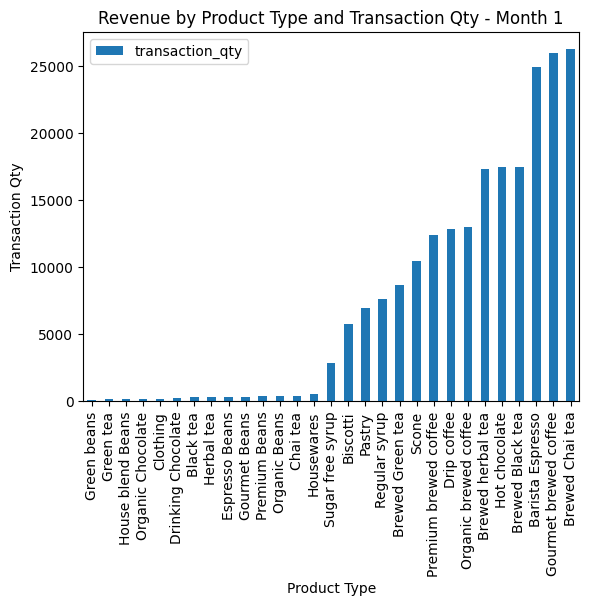

2
(16359, 21)


<Figure size 800x400 with 0 Axes>

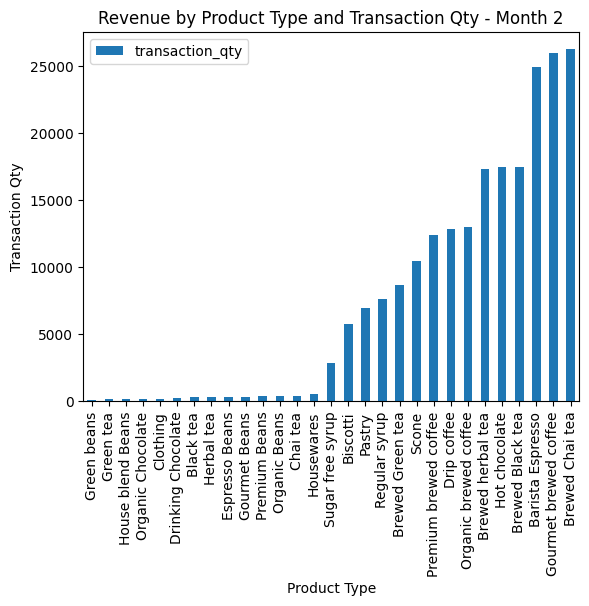

3
(21229, 21)


<Figure size 800x400 with 0 Axes>

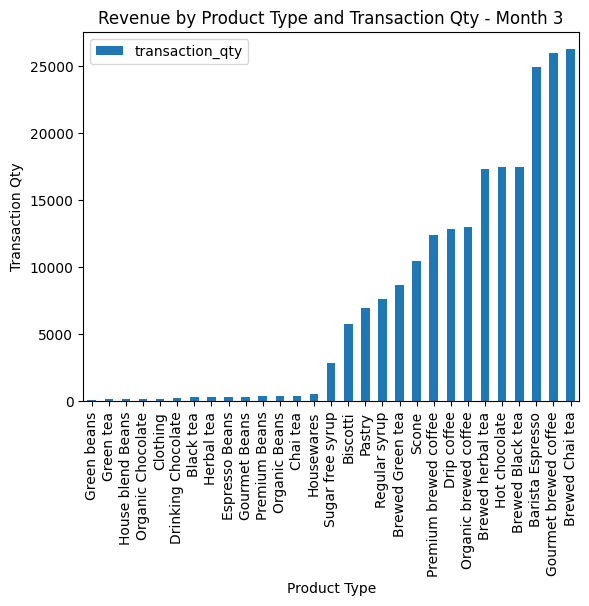

4
(25335, 21)


<Figure size 800x400 with 0 Axes>

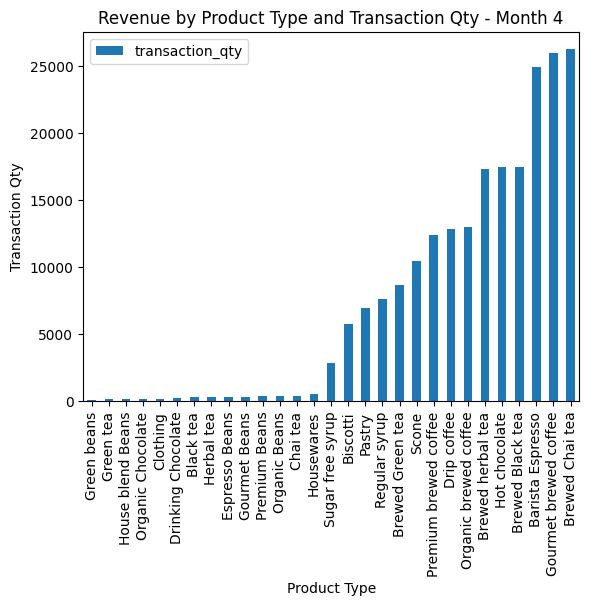

5
(33527, 21)


<Figure size 800x400 with 0 Axes>

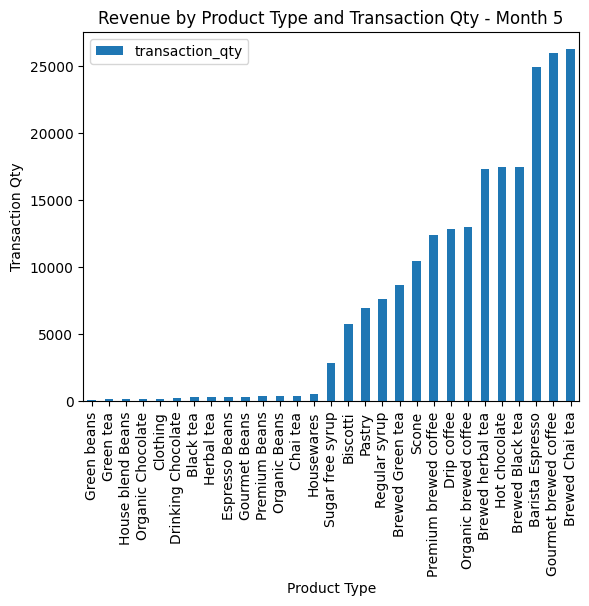

6
(35352, 21)


<Figure size 800x400 with 0 Axes>

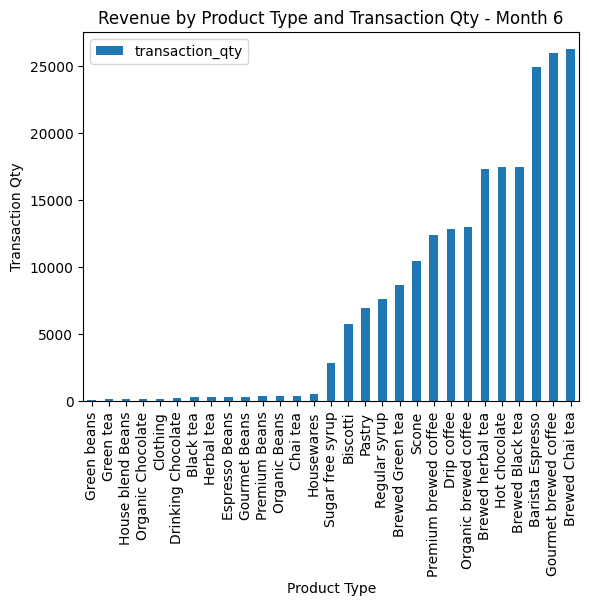

In [111]:
for mon in coffee_data["transaction_month"].unique():
    print(mon)
    coffee_data_mon = coffee_data[coffee_data["transaction_month"]==mon]
    print(coffee_data_mon.shape)

    # bar graph for transaction_qty and revenue for each month
    grp_data = coffee_data.groupby(["product_type"])[["transaction_qty","revenue"]].sum().sort_values(by = ["transaction_qty"])
    # plt.figure(figsize=(8,4))
    # grp_data.plot(kind="bar")
    # plt.title(f"Revenue by Product Type and Transaction Qty - Month {mon}")
    # plt.xlabel("Product Type")
    # plt.ylabel("Transaction Qty")
    # plt.show()

## Observations
- Data present from Jan-2023 to June-2023 with no records for null dates
- There was a dip in Feb-2023
- Best selling is Barista Espresso
- Total revenue by location is not showing any variance which tells me that the problem is somewhere else

## Suggestion
- Reduce the number of product types so can focus on the important items. Redesign the menu for the cafe.
- To avoid any losses on the existing inventory we can close off the inventory by offering discounts
## More data points
- Data regarding discounts will be more helpful. Will help us provide more insights
- 

1
(17314, 21)
2
(16359, 21)
3
(21229, 21)
4
(25335, 21)
5
(33527, 21)
6
(35352, 21)
